# Convert all daily JSON log files for a deployment to a single NetCDF file
using CF-1.6, Discrete Sampling Geometry (DSG) conventions, **`featureType=timeSeries`**

In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import glob

from pyaxiom.netcdf.sensors import TimeSeries

In [2]:
path = '/sand/usgs/users/rsignell/data/ooi/endurance/cg_proc/ce02shsm/D00004/buoy/pwrsys/*.pwrsys.json'
odir = '/usgs/data2/notebook/data/nc'
ofile = 'ce02shsm_pwrsys_D00004.nc'

In [3]:
def json2df(infile):
    with open(infile) as jf:
        df = pd.DataFrame(json.load(jf))
        return df

In [4]:
# single dataframe from all JSONs
df = pd.concat([json2df(file) for file in glob.glob(path)])

In [5]:
df['time'] = pd.to_datetime(df.time, unit='s')
df.index = df['time']
df['depth'] = 0.0

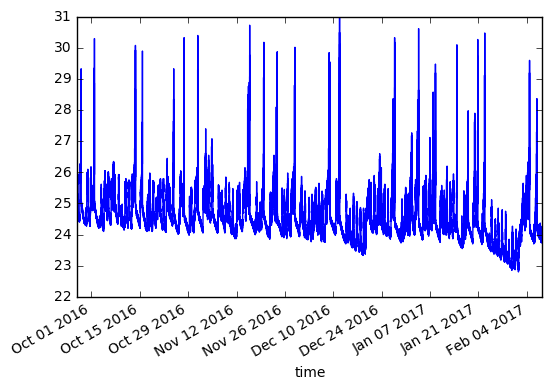

In [6]:
df['solar_panel4_voltage'].plot();

### Define the NetCDF global attributes

In [7]:
global_attributes = {
    'institution':'Oregon State University', 
    'title':'OOI CE02SHSM Pwrsys Data',
    'summary':'OOI Pwrsys data from Coastal Endurance Oregon Shelf Surface Mooring',
    'creator_name':'Chris Wingard',
    'creator_email':'cwingard@coas.oregonstate.edu',
    'creator_url':'http://ceoas.oregonstate.edu/ooi'
}

### Create initial file

In [8]:
ts = TimeSeries(
    output_directory=odir,
    latitude=44.64,
    longitude=-124.31,
    station_name='ce02shsm',
    global_attributes=global_attributes,
    times=df.time.values.astype(np.int64) // 10**9,
    verticals=df.depth.values,
    output_filename=ofile,
    vertical_positive='down'
)

### Add data variables

In [9]:
df.columns.tolist()

['battery_bank1_current',
 'battery_bank1_temperature',
 'battery_bank1_voltage',
 'battery_bank2_current',
 'battery_bank2_temperature',
 'battery_bank2_voltage',
 'battery_bank3_current',
 'battery_bank3_temperature',
 'battery_bank3_voltage',
 'battery_bank4_current',
 'battery_bank4_temperature',
 'battery_bank4_voltage',
 'cvt_current',
 'cvt_interlock',
 'cvt_state',
 'cvt_temperature',
 'cvt_voltage',
 'dcl_date_time_string',
 'error_flag1',
 'error_flag2',
 'error_flag3',
 'external_current',
 'external_voltage',
 'fuel_cell1_current',
 'fuel_cell1_state',
 'fuel_cell1_voltage',
 'fuel_cell2_current',
 'fuel_cell2_state',
 'fuel_cell2_voltage',
 'fuel_cell_volume',
 'internal_current',
 'internal_temperature',
 'internal_voltage',
 'main_current',
 'main_voltage',
 'override_flag',
 'percent_charge',
 'seawater_ground_negative',
 'seawater_ground_positve',
 'seawater_ground_state',
 'solar_panel1_current',
 'solar_panel1_state',
 'solar_panel1_voltage',
 'solar_panel2_current',

In [10]:
for c in df.columns:
    if c in ts._nc.variables:
        print("Skipping '{}' (already in file)".format(c))
        continue
    if c in ['time', 'lat', 'lon', 'depth', 'cpm_date_time_string']:
        print("Skipping axis '{}' (already in file)".format(c))
        continue
    print("Adding {}".format(c))
    try:
        ts.add_variable(c, df[c].values)
    except:
        print('skipping, hit object')
        

Adding battery_bank1_current
Adding battery_bank1_temperature
Adding battery_bank1_voltage
Adding battery_bank2_current
Adding battery_bank2_temperature
Adding battery_bank2_voltage
Adding battery_bank3_current
Adding battery_bank3_temperature
Adding battery_bank3_voltage
Adding battery_bank4_current
Adding battery_bank4_temperature
Adding battery_bank4_voltage
Adding cvt_current
Adding cvt_interlock
Adding cvt_state
Adding cvt_temperature
Adding cvt_voltage
Adding dcl_date_time_string
skipping, hit object
Adding error_flag1
skipping, hit object
Adding error_flag2
skipping, hit object
Adding error_flag3
skipping, hit object
Adding external_current
Adding external_voltage
Adding fuel_cell1_current
Adding fuel_cell1_state
Adding fuel_cell1_voltage
Adding fuel_cell2_current
Adding fuel_cell2_state
Adding fuel_cell2_voltage
Adding fuel_cell_volume
Adding internal_current
Adding internal_temperature
Adding internal_voltage
Adding main_current
Adding main_voltage
Adding override_flag
skippin

In [13]:
df['error_flag1'].dtype.name

'object'